In [52]:
#Question1_B
#import neccesary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
plt.rcParams['figure.figsize'] = [9,9]

In [53]:
#number of features for 4-D real values vectors
features = 4
#number of samples to be generated for the vector
samples = 10000

In [54]:
#initialize the means for different classes
mean = np.zeros((features,features)) #4x4 zero vector
mean[:,0] = [-1,-1,-1,-1] #mean vector of class 0
mean[:,1] = [ 1, 1, 1, 1] #mean vector of class 1

In [55]:
#initialize the covariance matrices
cov = np.zeros((features, features,features))
cov[:,:,0] = [[2,-0.5,0.3,0],[-0.5,1,-0.5,0],[0.3,-0.5,1,0],[0,0,0,2]] #covariance matrix of class 0
cov[:,:,1] = [[1,0.3,-0.2,0],[0.3,2,0.3,0  ],[-0.2,0.3,1,0],[0,0,0,3]] #covariance matrix of class 1

#cov[:,:,0] = [[2,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,2]] #covariance matrix of class 0
#cov[:,:,1] = [[1,0,0,0],[0,2,0,0],[0,0,1,0],[0,0,0,3]] #covariance matrix of class 1

In [56]:
#initialize priors of class 0 and class 1 respectively
prior = [0.7, 0.3]

In [57]:
#generate 10,000 samples of 4D data
label = np.zeros((2, samples)) #4x10000 zero matrix for label values
label[0,:] = (np.random.uniform(0,1,samples) >= prior[0]).astype(int) #draws 10,000 samples from a uniform distribution with low of 0 and high of 1 and compares if true/false >= prior of class 0
X = np.zeros((features,samples)) #4x10000 zero matrix for X values
for index in range(samples): #compare index number in sample number
    if(label[0,index] == 0): #if the the class prior is not higher than prior 0
        X[:,index] = np.random.multivariate_normal(mean[:,0],cov[:,:,0],1) #assign random number from normal distrubution of class 0 mean and cov
    else:
        X[:,index] = np.random.multivariate_normal(mean[:,1],cov[:,:,1],1) #assign random number from normal distrubution of class 1 mean and cov  

In [58]:
#initialize class matrix
class0_count = float(list(label[0,:]).count(0)) #number of samples for class 0
class1_count = float(list(label[0,:]).count(1)) #number of samples for class 1
fpr = [] #false positive rate array
tpr = [] #true positive rate array
minPerror = [] #false positive rate array
gamma_list = []

In [59]:
#create list of threshold values for plotting ROC curve
q = list(sorted(X[0,:])) #sorted values from X random variable matrix
gamma_list = [] #gamma array
for i in range(0,9999): #i for the index of the 10000 samples
    gamma_list.append((q[i] + q[i+1])/2.0) #midpoints of sorted X as threshold values and add to the gamma list
gamma_list = [gamma_list[i] for i in range(0,len(gamma_list)) if gamma_list[i]>=0] #ensure all positive values

In [60]:
#calculate disciminant score
#.T access the attribute to T of the object transpose
logValpdf0 = np.log(multivariate_normal.pdf(X.T,mean=mean[:,0], cov=np.identity(4))) #takes the log
logValpdf1 = np.log(multivariate_normal.pdf(X.T,mean=mean[:,1], cov=np.identity(4)))
discriminant_score = logValpdf1 - logValpdf0 #discriminant score

In [61]:
#calculate probability of minimum error for all values in gamma_list
for gamma in gamma_list:
    label[1,:] = (discriminant_score >= np.log(gamma)).astype(int) #compare the discriminant score with the threshold gamma
    x00 = [i for i in range(label.shape[1]) if (label[1,i] == 0 and label[0,i] == 0)] #true negative
    x01 = [i for i in range(label.shape[1]) if (label[1,i] == 0 and label[0,i] == 1)] #false negative
    x10 = [i for i in range(label.shape[1]) if (label[1,i] == 1 and label[0,i] == 0)] #false positive/false alarm
    x11 = [i for i in range(label.shape[1]) if (label[1,i] == 1 and label[0,i] == 1)] #true positive/correct detection
    fpr.append(len(x10)/class0_count) #divide false positives by the number of class 0 --> probability of false positives/false alarm
    tpr.append(len(x11)/class1_count) #divide true positives by the number of class 0 --> probability of true positives/correct detection
    minPerror.append(1-((len(x00)+len(x11))/10000.0)) #probability that it is not a a false positive or true positive

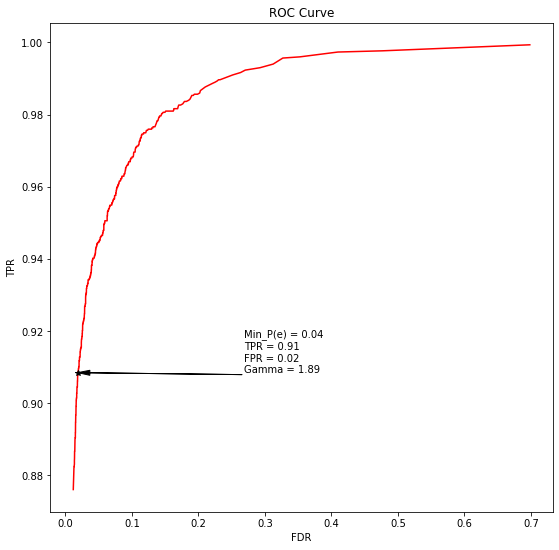

In [62]:
#plot ROC curve with minimum error point
plt.plot(fpr,tpr,color ='red')
plt.xlabel('FDR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.plot(fpr[np.argmin(minPerror)],tpr[np.argmin(minPerror)],'*',color='black')
plt.title('ROC Curve')
plt.annotate(s='Min_P(e) = ' +str(round(minPerror[np.argmin(minPerror)],3)) + '\n'
            +'TPR = '+ str(round(tpr[np.argmin(minPerror)],2)) +'\n'
            +'FPR = '+ str(round(fpr[np.argmin(minPerror)],2)) +'\n'
            +'Gamma = '+ str(round(gamma_list[np.argmin(minPerror)],2)),xy
            =(fpr[np.argmin(minPerror)],tpr[np.argmin(minPerror)]),
            xytext = (fpr[np.argmin(minPerror)]+.25,tpr[np.argmin(minPerror)]),
            arrowprops=dict(facecolor='black', width = 0.01, headwidth =5, shrink=0))
plt.show()